# Assignment 3: Numerical Solution of an Ordinary Differential Equation

This notebook explores numerical solutions to the ordinary differential equation:

$
f(x, t) = \frac{dx}{dt} = (1 + t)x + 1 - 3t + t^2
$

### Objectives:
1. **Direction Field**: Visualize the direction field for $ t \in [0, 5] $ and $ x \in [-3, 3] $.
2. **Numerical Methods**: Solve the ODE using:
   - Euler Method
   - Improved Euler Method
   - Runge-Kutta Method
3. **Comparison**: Analyze the behavior of the solutions with different step sizes ($ h = 0.04 $ and $ h = 0.02 $).
4. **Critical Value**: Identify the starting value $ x(t=0) $ such that $ x(t=5) \in [-2.0, -1.9] $.

### Deliverables:
- Direction field visualization.
- Numerical solutions plotted for all methods.
- Observations on the accuracy and benefits of different integration schemes.
- Python code for solving the ODE and generating the results.

### Task 1:
1. **Direction Field**: Visualize the direction field for $ t \in [0, 5] $ and $ x \in [-3, 3] $. With,

            
$f(x, t) = \frac{dx}{dt} = (1 + t)x + 1 - 3t + t^2$
            

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define the ODE function
def f(x, t):
    return (1 + t) * x + 1 - 3 * t + t**2

Task 1: Direction field plot created and saved as 'direction_field.png'


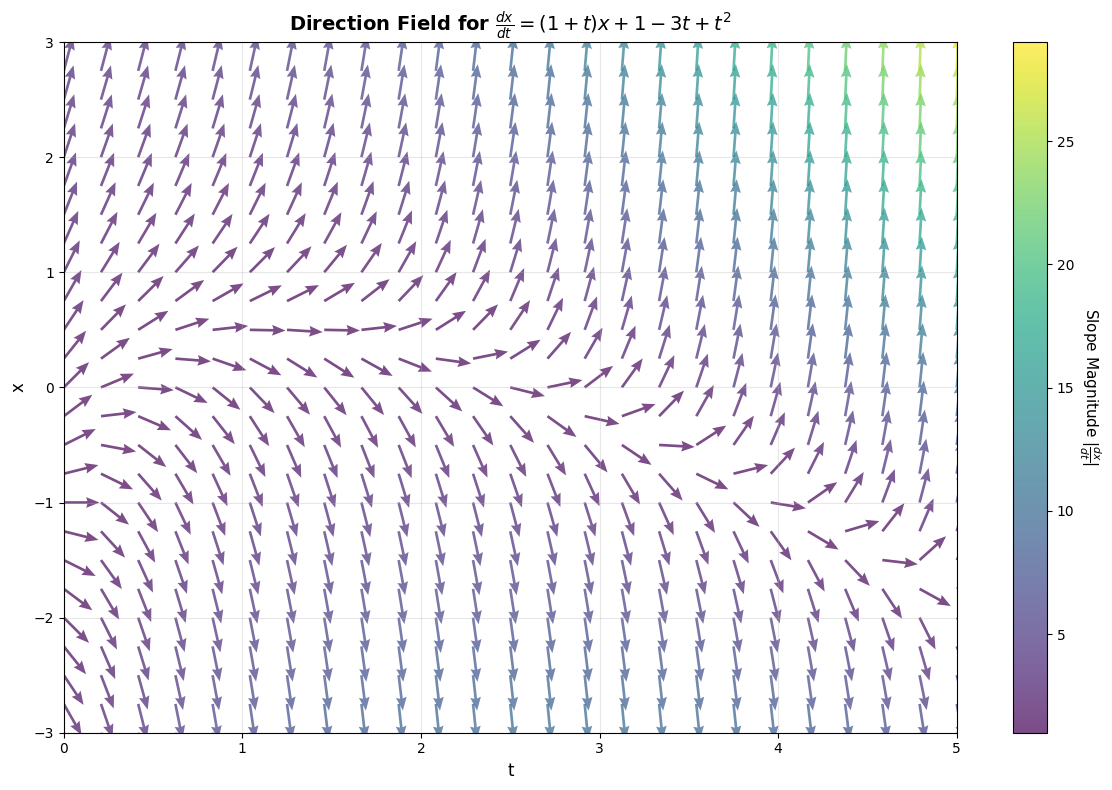

In [5]:
def direction_field():
    # Create grid
    t_values = np.linspace(0, 5, 25)
    x_values = np.linspace(-3, 3, 25)

    # Create meshgrid
    T, X = np.meshgrid(t_values, x_values)

    # Calculate slopes (dx/dt) at each grid point
    dT = np.ones_like(T)  # dt = 1 (unit step in t direction)
    dX = f(X, T)           # dx/dt from our ODE

    # Normalize arrows for better visualization
    # This makes all arrows the same length, only showing direction
    magnitude = np.sqrt(dT**2 + dX**2)
    dT_norm = dT / magnitude
    dX_norm = dX / magnitude

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot direction field using quiver
    Q = ax.quiver(T, X, dT_norm, dX_norm, 
                    magnitude, 
                    cmap='viridis',
                    alpha=0.7,
                    scale=25,
                    width=0.003,
                    headwidth=4,
                    headlength=5)

    # Add colorbar to show magnitude
    cbar = plt.colorbar(Q, ax=ax)
    cbar.set_label(r'Slope Magnitude $|\frac{dx}{dt}|$', rotation=270, labelpad=20, fontsize=11)

    # Labels and formatting
    ax.set_xlabel('t', fontsize=12)
    ax.set_ylabel('x', fontsize=12)
    ax.set_title(r'Direction Field for $\frac{dx}{dt} = (1+t)x + 1 - 3t + t^2$', 
                    fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 5)
    ax.set_ylim(-3, 3)


    plt.tight_layout()
    plt.savefig('direction_field.png', dpi=300, bbox_inches='tight')
    print("Task 1: Direction field plot created and saved as 'direction_field.png'")

direction_field()
plt.show()


### Task 2:
2. **Numerical Methods**: Solve the ODE using:
   - Simple Euler Method


In [6]:
# define simple euler update - From Blackboard scripts
def seuler(t, x, step=0.04):
    """Simple Euler method: x_new = x + h * f(x, t)"""
    x_new = x + step * f(x, t)
    return x_new

In [7]:
# Initialize
t = 0.0
x = 0.0655
h = 0.04
t_end = 5.0

t_values = [t]
x_values = [x]

# Iterate
while t < t_end:
    x = seuler(t, x, h)  # Update x
    t = t + h             # Update t
    t_values.append(t)
    x_values.append(x)

Task 1: Direction field plot created and saved as 'direction_field.png'


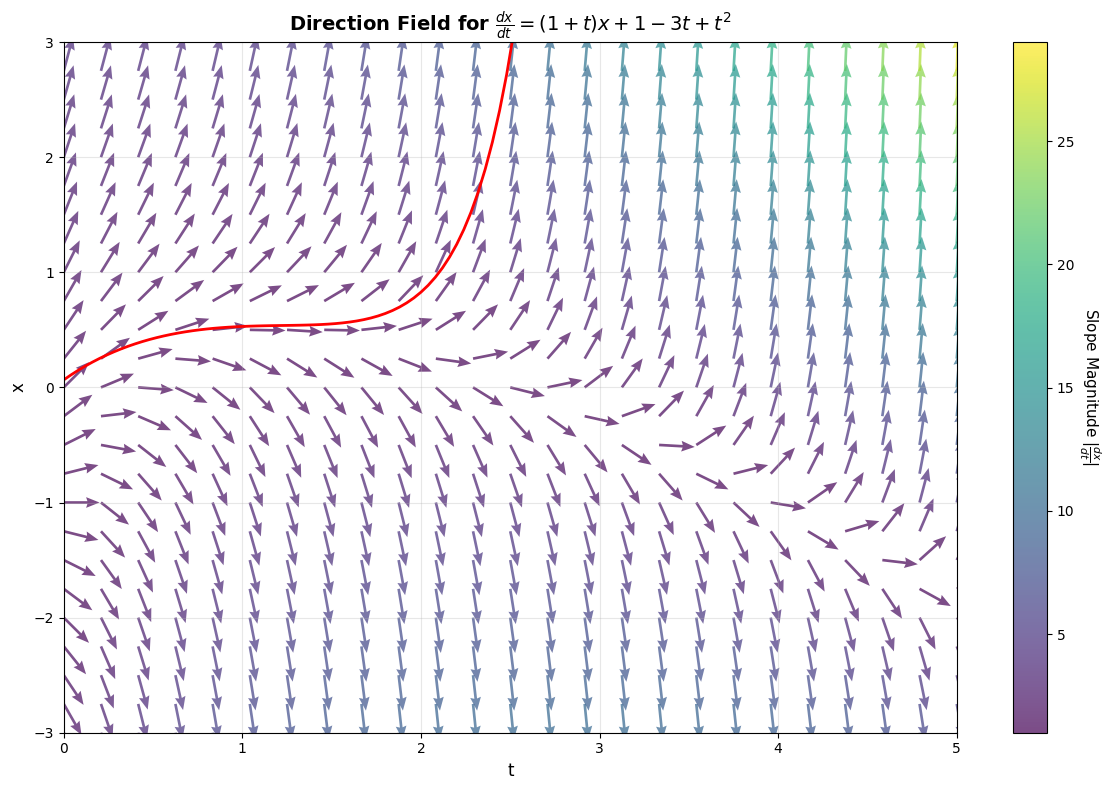

In [8]:
direction_field()
# Plot the Euler solution on top of the direction field
plt.plot(t_values, x_values, 'r-', label='Simple Euler Approximation, Step={h}', linewidth=2)


Improved Eular Mathod

In [9]:
# define improved euler update
def ieuler(x,y,step):
	y_new = y + 0.5*step*( f(x,y) + f(x+step, y + step*f(x, y)) )
	return y_new

Runge Kutte Method

In [10]:
# define Runge Kutta update
def rk(x,y,step):
	k1 = f(x,y)
	k2 = f(x + 0.5*step, y + 0.5*step*k1)
	k3 = f(x + 0.5*step, y + 0.5*step*k2)
	k4 = f(x + step, y + step*k3)
	y_new = y + step/6.0*(k1 + 2.0*k2 + 2.0*k3 + k4) 
	return y_new